## <center>House Price Pridiction


### Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [275]:
# importing required librarary 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [276]:
# reading csv file 
train = pd.read_csv("Datasets/house_train.csv")
pd.set_option("Display.max_columns",None) # displaying the all columns
pd.set_option("Display.max_rows",None) # displaying the all rows

train.head()  #viewing top 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [277]:
# Size of the dataset is
train.shape

(1168, 81)

In [278]:
#copying dataset
copy_train = train.copy()

In [279]:
# Checking the feature
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

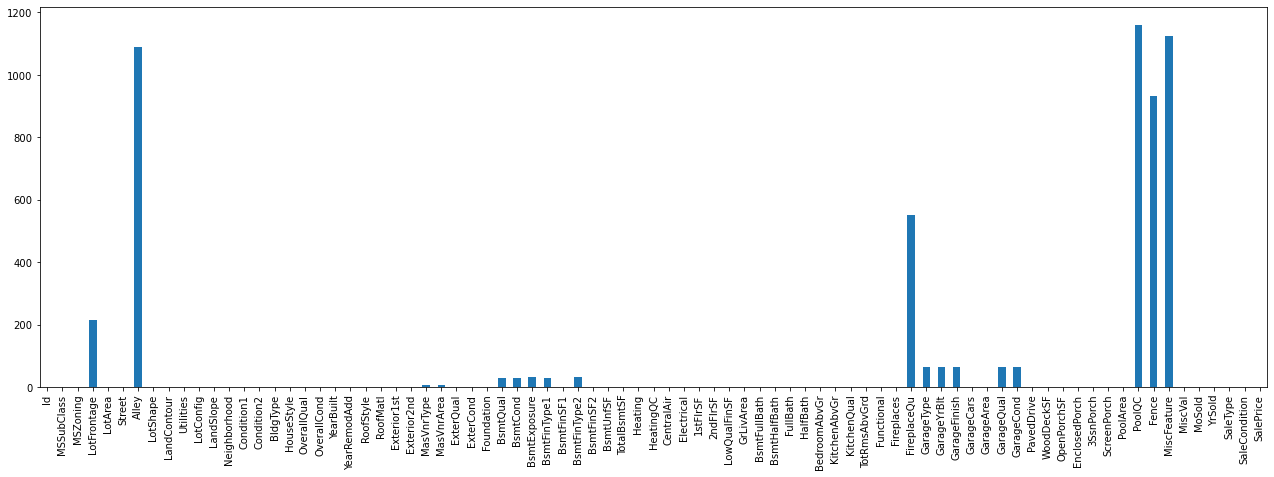

In [280]:
### Checking null values in dataset
plt.figure(figsize=(22,7))
train.isnull().sum().plot(kind="bar")

Above plot is showing some null value present in our dataset.We will check further to extract null feature data and deal with that.

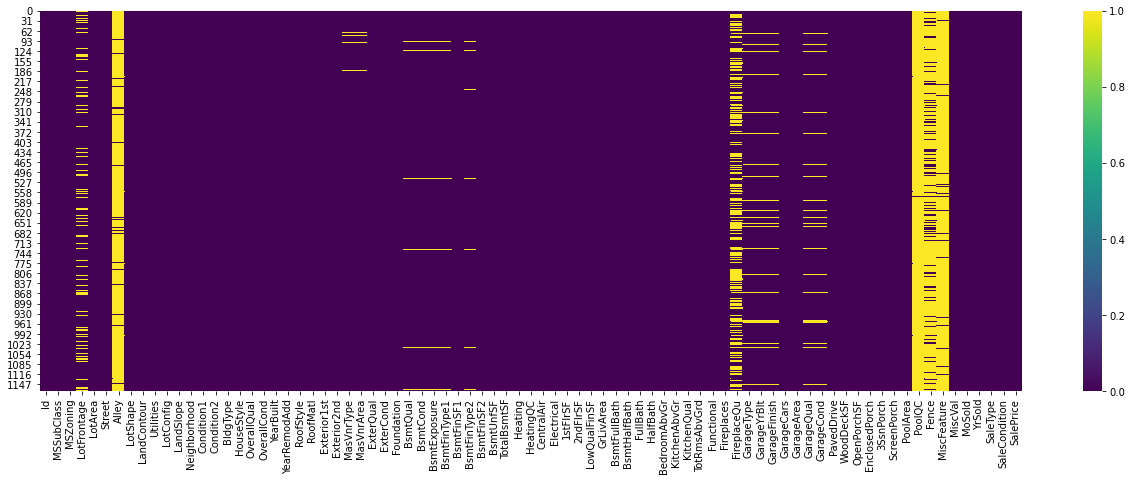

In [281]:
# We can check null values using heatmap also
plt.figure(figsize=(22,7))
sns.heatmap(train.isnull(),cmap='viridis')
plt.show()

In [282]:
#filterig only null columns
feature_with_na = [i for i in train.columns if train[i].isna().sum() > 1]
maxNullValue = [i for i in train.columns if train[i].isna().sum() > 500]

#Checking how much percentage feature having null values
for feature in feature_with_na:
    print(feature,np.round(train[feature].isna().mean(),4),"% missing value")

LotFrontage 0.1832 % missing value
Alley 0.9341 % missing value
MasVnrType 0.006 % missing value
MasVnrArea 0.006 % missing value
BsmtQual 0.0257 % missing value
BsmtCond 0.0257 % missing value
BsmtExposure 0.0265 % missing value
BsmtFinType1 0.0257 % missing value
BsmtFinType2 0.0265 % missing value
FireplaceQu 0.4717 % missing value
GarageType 0.0548 % missing value
GarageYrBlt 0.0548 % missing value
GarageFinish 0.0548 % missing value
GarageQual 0.0548 % missing value
GarageCond 0.0548 % missing value
PoolQC 0.994 % missing value
Fence 0.7971 % missing value
MiscFeature 0.9623 % missing value


<AxesSubplot:>

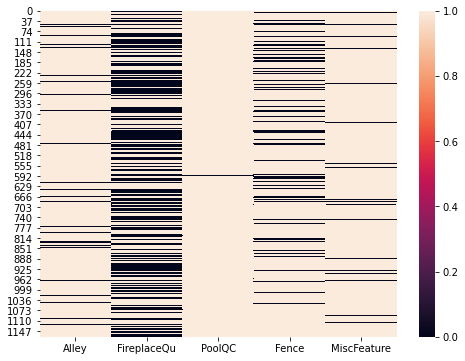

In [283]:
# max null value column
plt.figure(figsize=(8,6))
sns.heatmap(train[maxNullValue].isnull())

    Now we can see clearly only null value feature data.
    
    In above plot pink color is representing null value present in data
    
    so some of the feature having more null values we need to drop and deal with that data.

In [284]:
# Checking the datatype
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Observation :

    1. As per above dataset detail we checked we need to handle more num of indepentent variable
    
    2. Null value present in the datasets some column we can handle ,Alley,PoolQC,MiscFeature having almost all value null only so we can drop that later.
    
    3.In datasets lot of categorical data is their and we need to handle.Noisy categorical data is not there in dataset.
    
    4.All initilize step we need to handle.
    
    5.As per the customer request we need find price of houses.
    
    6.Price of house is the continues variable so we need to use linear regression algorithm to train and test the dataset.

#### Understanding about feature

- **ID** is the unique value so we can **drop** that feature later. 
- **MSSubclass** this is categorical featuren descriping about type of house.
- **MSZoning**  Categorical variable to describe the type of area the house builded.
- **LotFrontage	and LotArea	**  Numerical data descripe about extra area apart from house.
- **Street** - Type of road descriped 
- **Alley** - Type of alley access to property - We can replace null value using 'not Access' value
- **LotShape** - Categorical variable
- **LandContour** - Land type - Categorical - we need to compare with cost ,qulaity, condition
- **Utilities** - Categorical variable looks important feature
- 	LotConfig,LandSlope	
- We need to compare same kind of feature like TotRmsAbvGrd and functional
- We need to split categorical ,numerical and Temporal variable

#### Summary of the data :

1. Shape is 1168 row and 81 column

2. 18 feature having null value and in that 5 feature having ('Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature') more than 500 null values we need deal with that or else drop the feature.

3. We created seperete null value feature dataframe (na_features) to handle missing value. 

4. We have totally 81 feature in that 38 is numerical and 43 object variable.

5. We notices in above dataframe some numerical featuren relavent to categorical and some feature in data time so we need to deal with that.

### We are checking null value relationship with sales

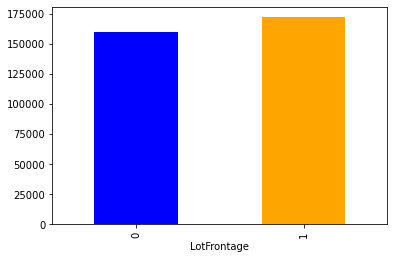

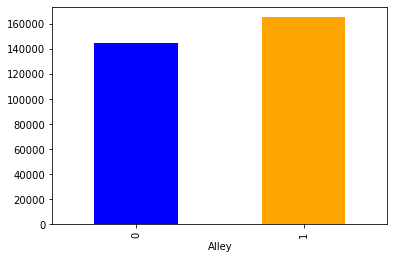

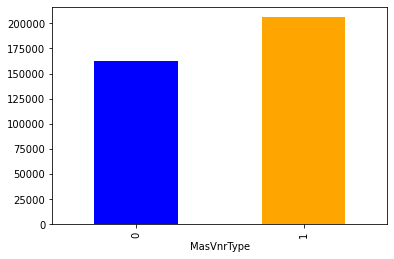

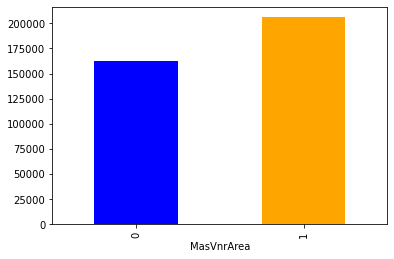

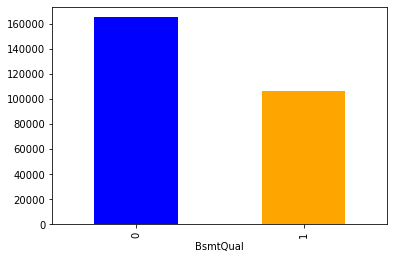

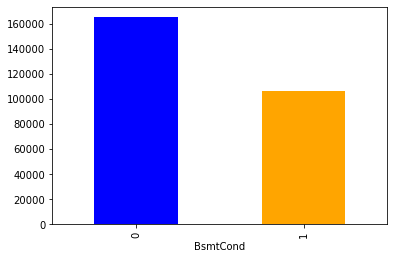

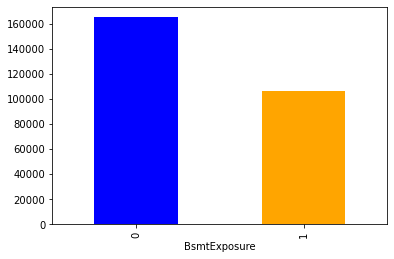

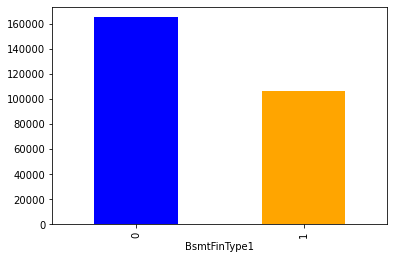

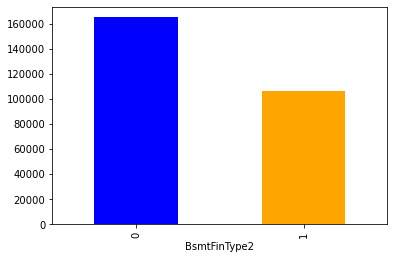

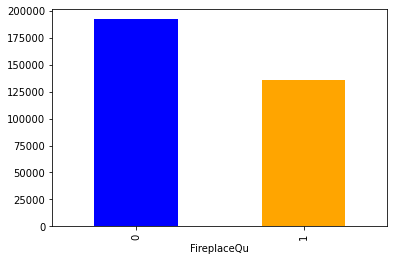

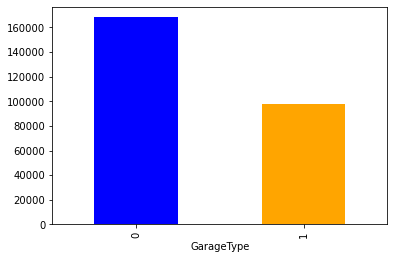

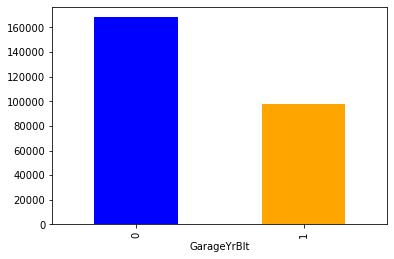

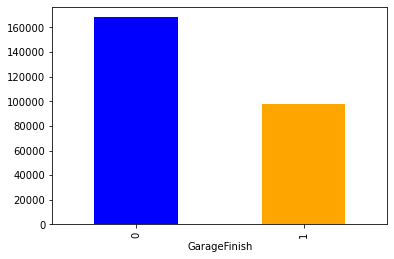

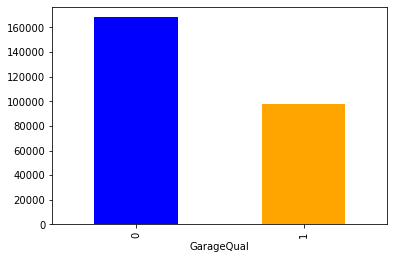

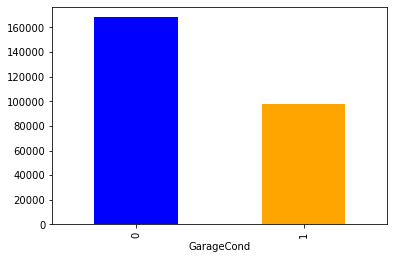

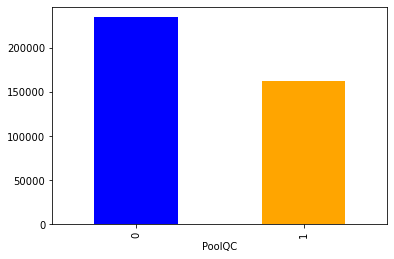

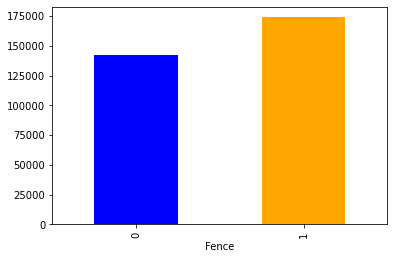

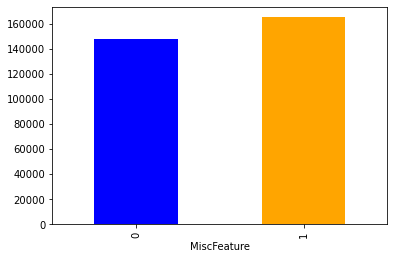

In [285]:
# lets plot diagram 

for feature in feature_with_na:
    data = train.copy()
    
    #if null value present in the data assign 1 or else 0
    data[feature] = np.where(data[feature].isna(),1,0)
    
    #bar plot
    plt.figure()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar',color=['blue','orange'])
    #print(data.groupby(feature)['SalePrice'].median())

#### Numerical value

In [286]:
numerical_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']

#number of numerical feature
print("Number of numerical feature is",len(numerical_feature))

data[numerical_feature].head()

Number of numerical feature is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


#### Temporal variable or Data feature

In [287]:
# In the dataset there is 4 data year feature we need to extract that feature
year_feature = [feature for feature in train.columns if 'Yr' in feature or 'Year' in feature]

print("Num of year feature",len(year_feature))
data[year_feature] #year dataframe.

Num of year feature 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009
5,2006,2006,2006.0,2006
6,1957,1996,1957.0,2010
7,1957,2000,1957.0,2006
8,1965,1965,1965.0,2007
9,1947,1950,1947.0,2008


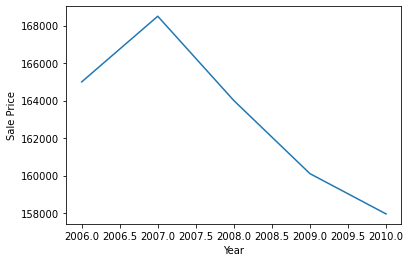

In [288]:
# Analyse the year data

plt.figure()
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year")
plt.ylabel("Sale Price")
plt.show()

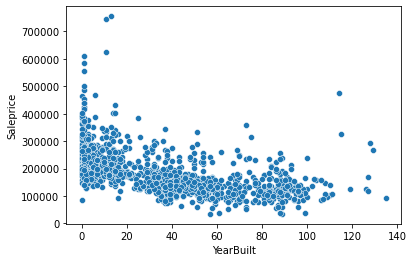

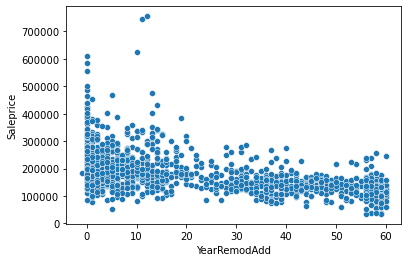

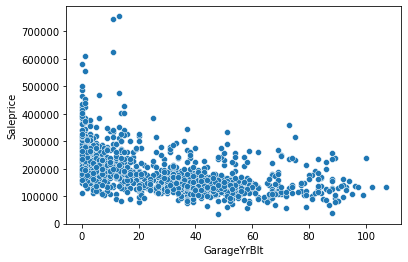

In [289]:
for i in year_feature:
    if i != 'YrSold':
        data[i] = data['YrSold']-data[i]
        plt.figure()
        sns.scatterplot(x=data[i],y='SalePrice',data=data)
        plt.xlabel(i)
        plt.ylabel("Saleprice")

for very old house price is getting down.

In [290]:
discrete_feature = [feature for feature in numerical_feature if len(train[feature].unique()) < 25 and feature not in year_feature +['Id']]
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [291]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


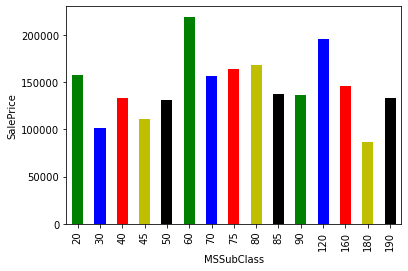

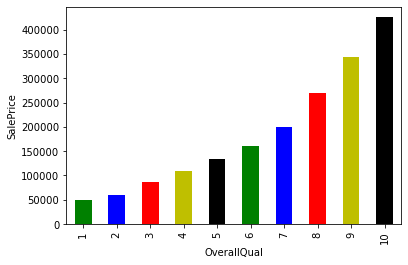

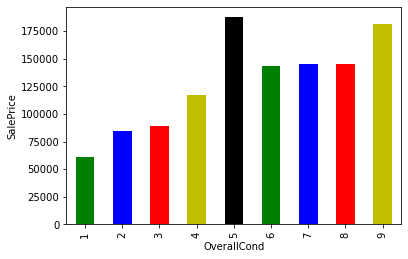

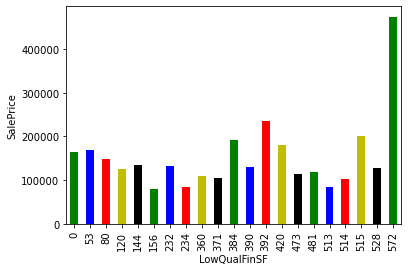

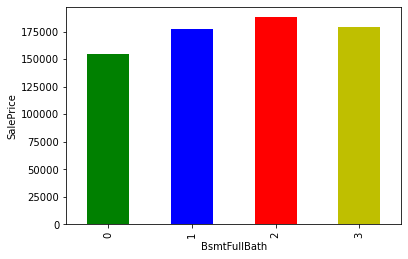

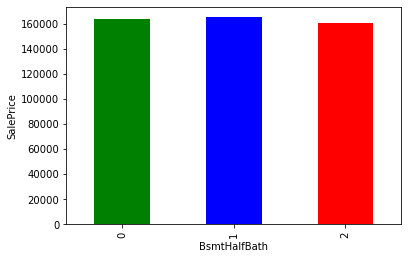

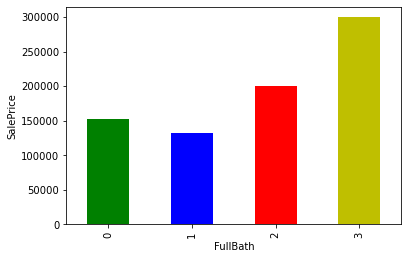

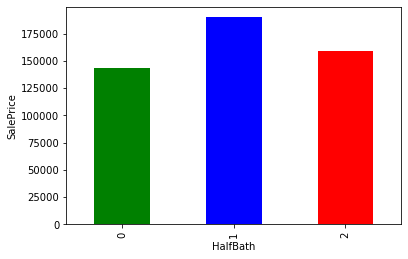

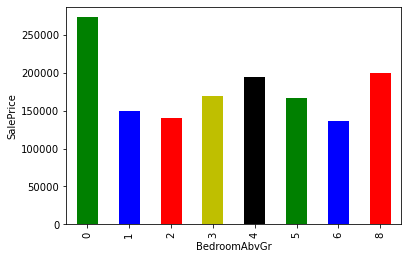

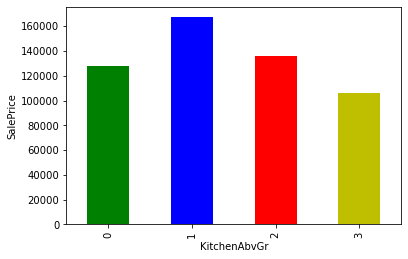

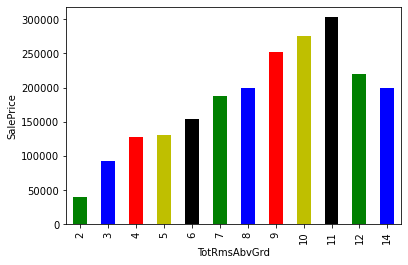

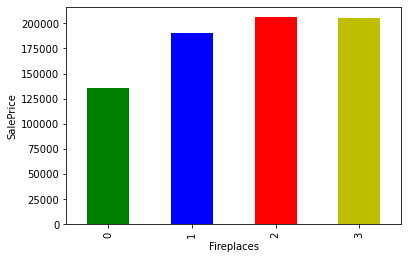

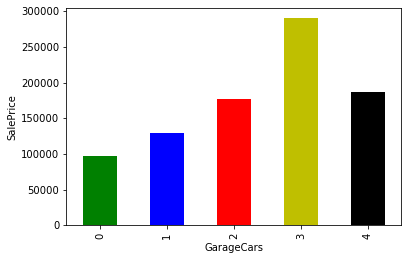

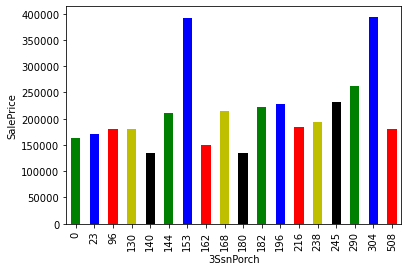

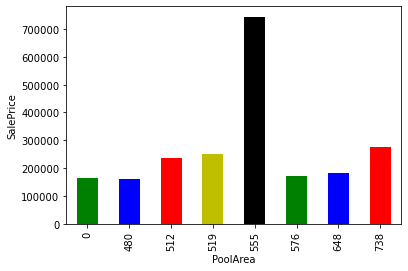

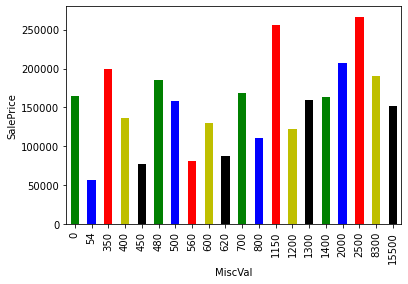

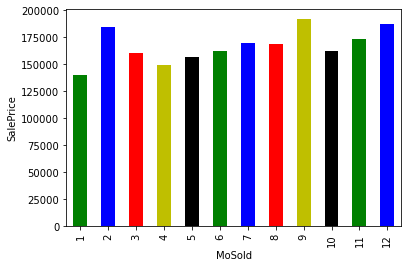

In [292]:
# let check relationship with saleprice

for i in discrete_feature:
    plt.figure()
    data.groupby(i)['SalePrice'].median().plot(kind="bar",color=["g", "b","r","y","k"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.show()

In [293]:
np.arange(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

### Continues Feature

In [294]:
continues_feature = [feature for feature in numerical_feature if feature not in discrete_feature + year_feature+['Id']]
print("Size of continues feature ",len(continues_feature))
data[continues_feature].head()

Size of continues feature  16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,NaN,4928,0.0,120,0,958,1078,958,0,958,440,0,205,0,0,128000
1,95.0,15865,0.0,351,823,1043,2217,2217,0,2217,621,81,207,0,224,268000
2,92.0,9920,0.0,862,0,255,1117,1127,886,2013,455,180,130,0,0,269790
3,105.0,11751,480.0,705,0,1139,1844,1844,0,1844,546,0,122,0,0,190000
4,NaN,16635,126.0,1246,0,356,1602,1602,0,1602,529,240,0,0,0,215000


<Figure size 432x288 with 0 Axes>

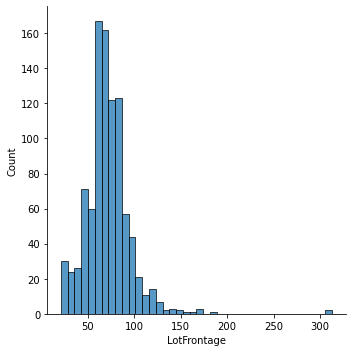

<Figure size 432x288 with 0 Axes>

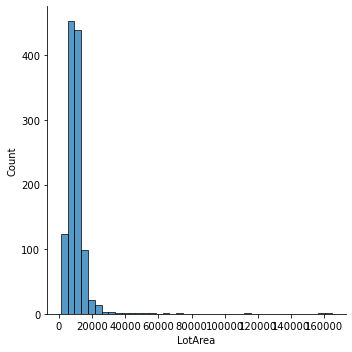

<Figure size 432x288 with 0 Axes>

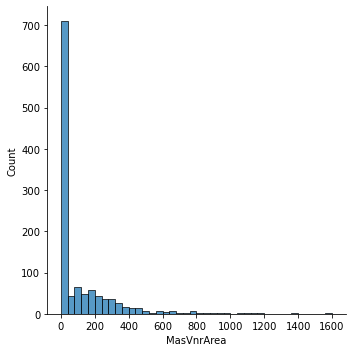

<Figure size 432x288 with 0 Axes>

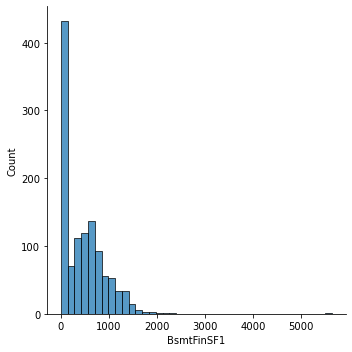

<Figure size 432x288 with 0 Axes>

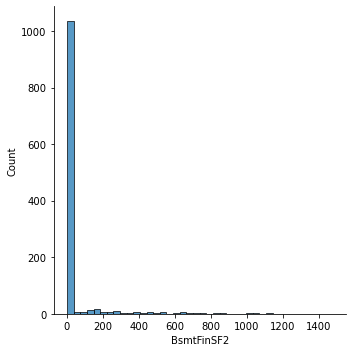

<Figure size 432x288 with 0 Axes>

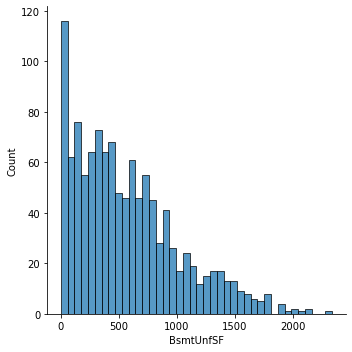

<Figure size 432x288 with 0 Axes>

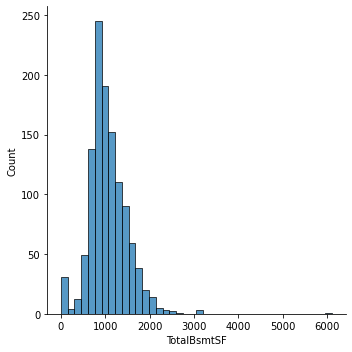

<Figure size 432x288 with 0 Axes>

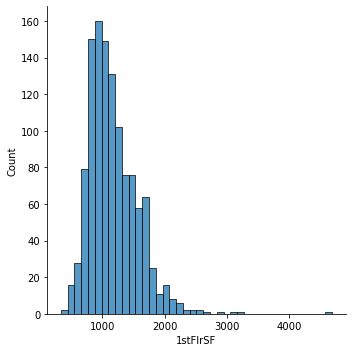

<Figure size 432x288 with 0 Axes>

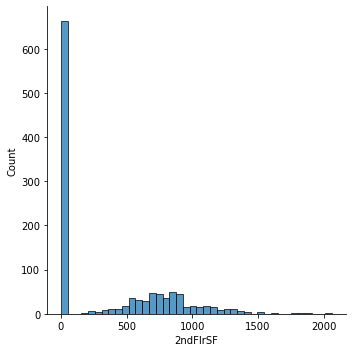

<Figure size 432x288 with 0 Axes>

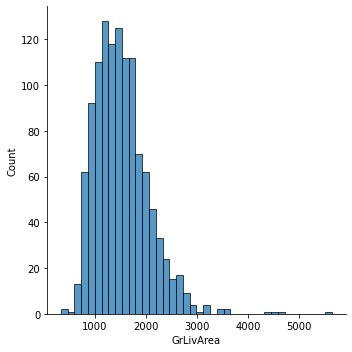

<Figure size 432x288 with 0 Axes>

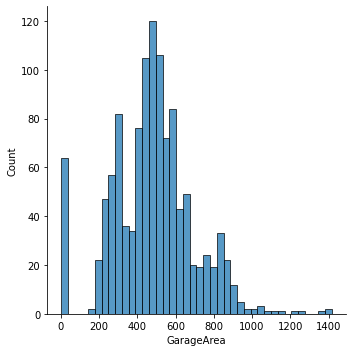

<Figure size 432x288 with 0 Axes>

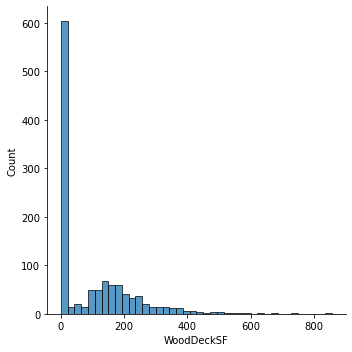

<Figure size 432x288 with 0 Axes>

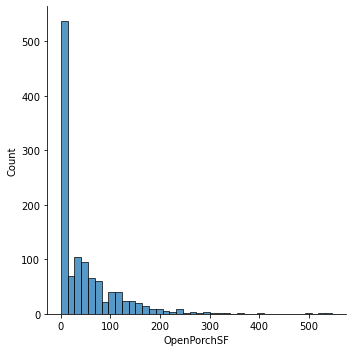

<Figure size 432x288 with 0 Axes>

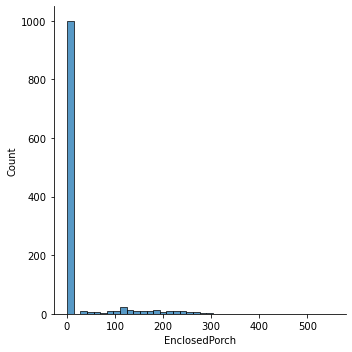

<Figure size 432x288 with 0 Axes>

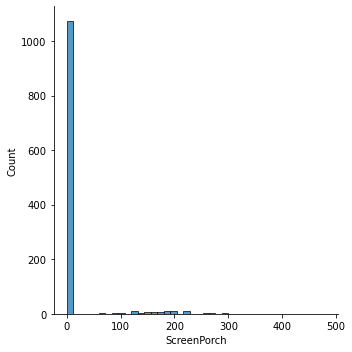

<Figure size 432x288 with 0 Axes>

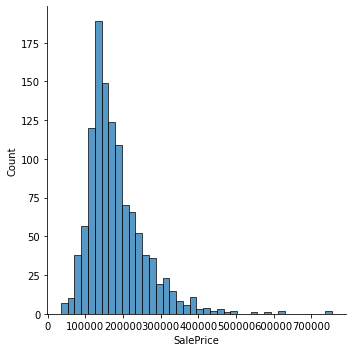

In [295]:
# Let analyse the continues variable using histogram 

for i in continues_feature:
    
    plt.figure()
    sns.displot(train[i],bins=40)
    plt.xlabel(i)

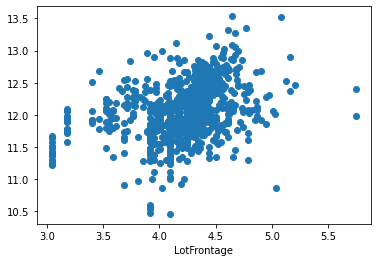

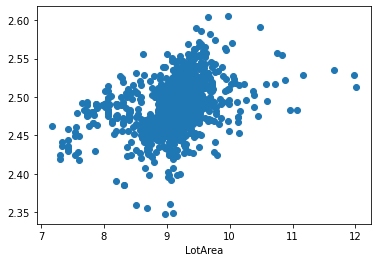

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

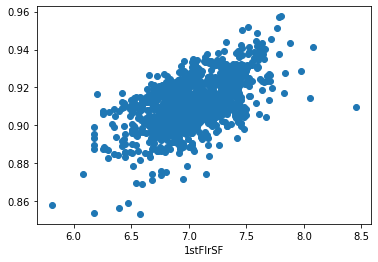

<Figure size 432x288 with 0 Axes>

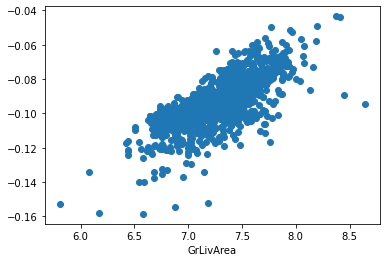

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

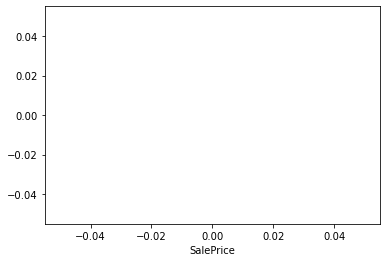

In [296]:
# Transforming the data to follow the Gaussian Distribution

data = train.copy()

for feature in continues_feature:
    plt.figure()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.show()

#### Outlier:

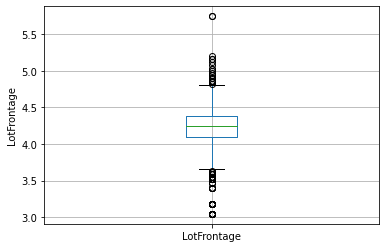

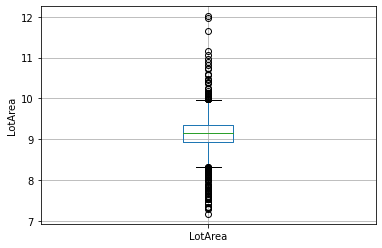

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

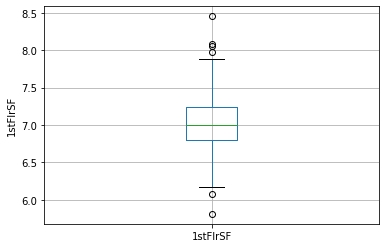

<Figure size 432x288 with 0 Axes>

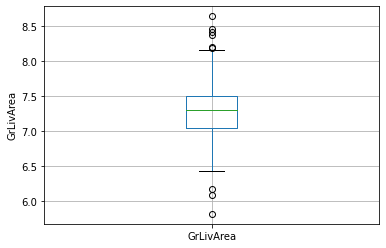

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

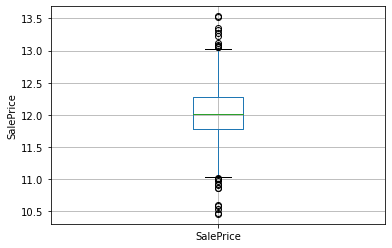

In [297]:
data = train.copy()
for feature in continues_feature:
    plt.figure()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        

Outlier is present in the dataset we need to deal with that later.

### Categorical Feature

In [298]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes == 'O']
data[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [299]:
# Checking number of category in each feature

for i in categorical_feature:
    print("The feature is {} and the number of category {}".format(i,len(train[i].unique())))

The feature is MSZoning and the number of category 5
The feature is Street and the number of category 2
The feature is Alley and the number of category 3
The feature is LotShape and the number of category 4
The feature is LandContour and the number of category 4
The feature is Utilities and the number of category 1
The feature is LotConfig and the number of category 5
The feature is LandSlope and the number of category 3
The feature is Neighborhood and the number of category 25
The feature is Condition1 and the number of category 9
The feature is Condition2 and the number of category 8
The feature is BldgType and the number of category 5
The feature is HouseStyle and the number of category 8
The feature is RoofStyle and the number of category 6
The feature is RoofMatl and the number of category 8
The feature is Exterior1st and the number of category 14
The feature is Exterior2nd and the number of category 15
The feature is MasVnrType and the number of category 5
The feature is ExterQua

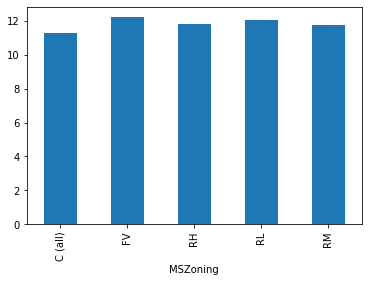

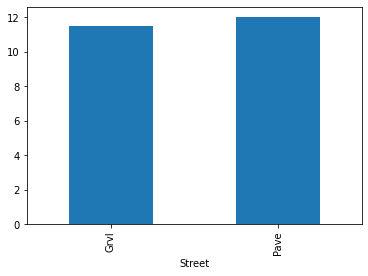

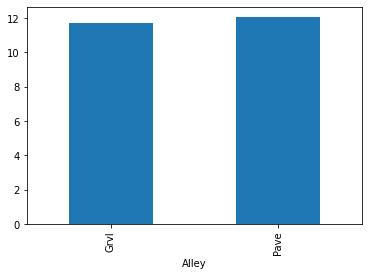

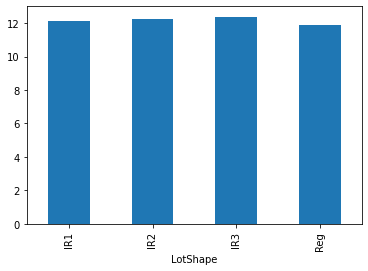

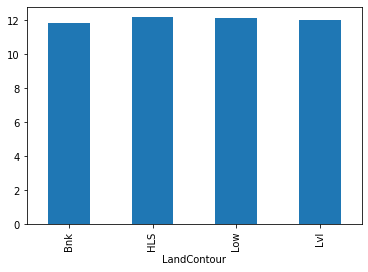

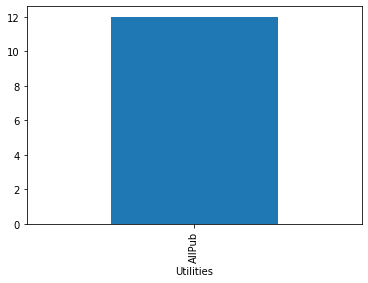

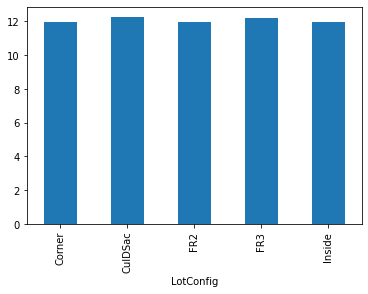

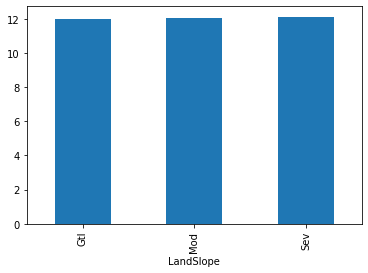

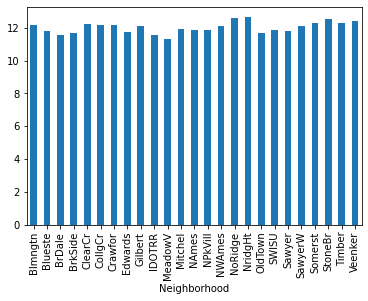

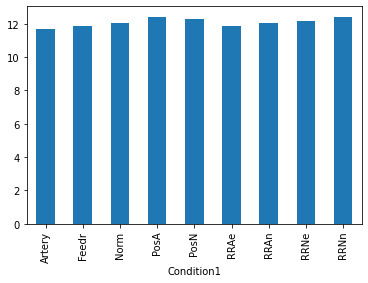

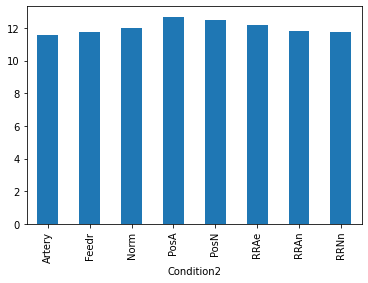

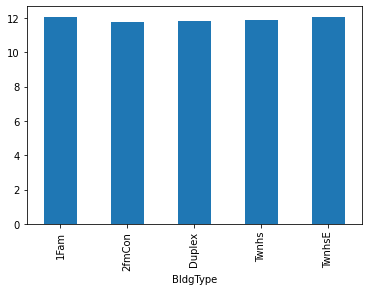

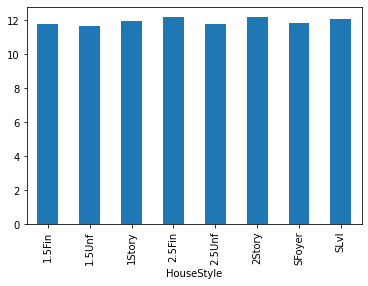

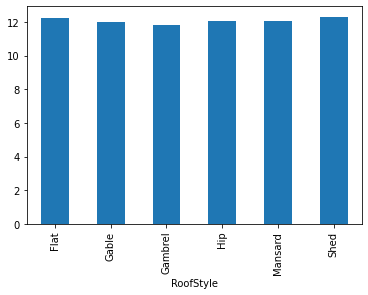

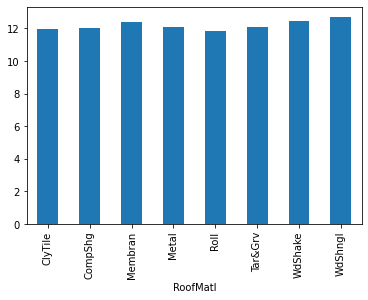

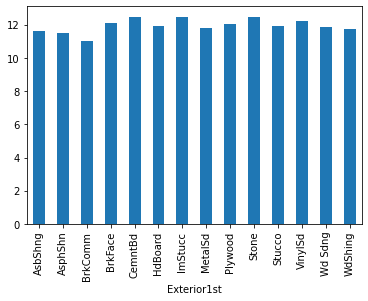

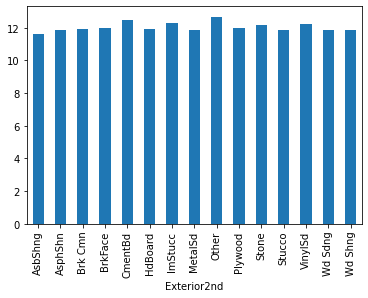

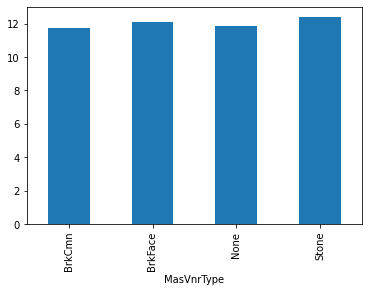

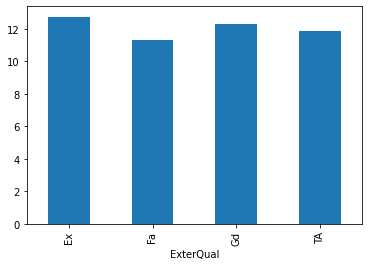

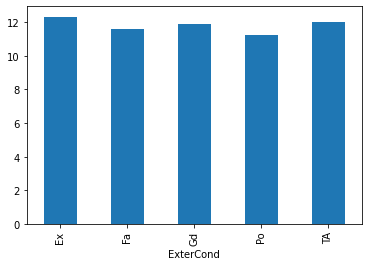

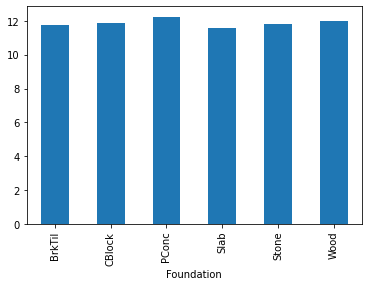

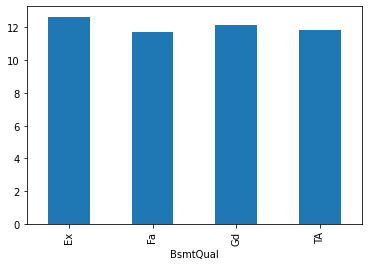

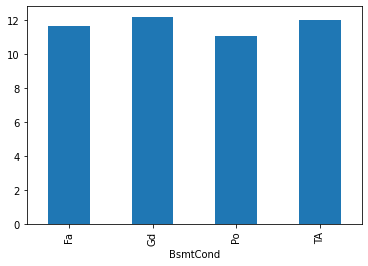

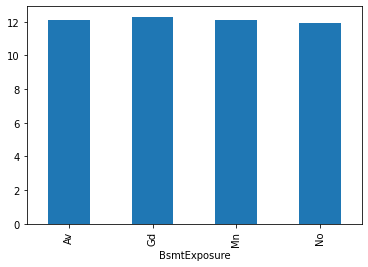

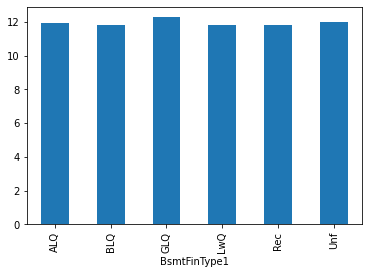

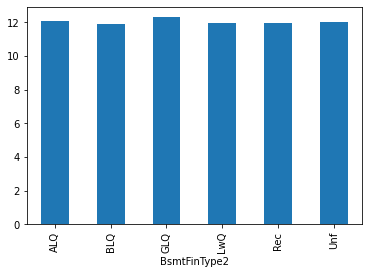

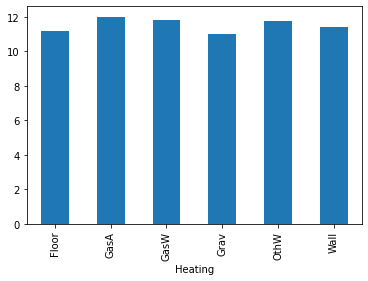

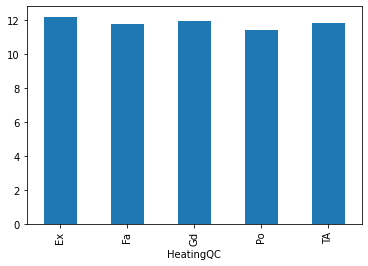

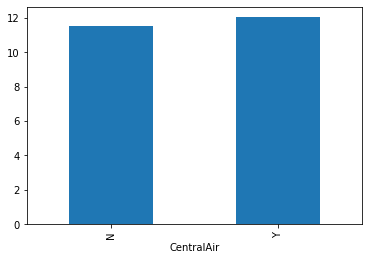

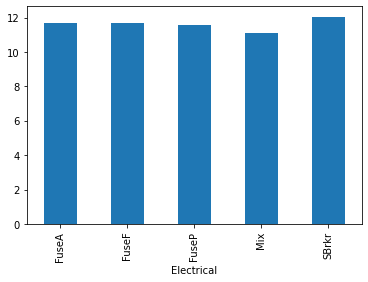

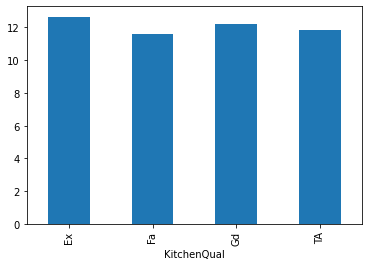

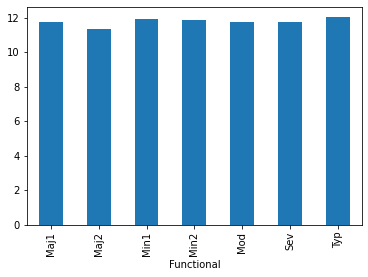

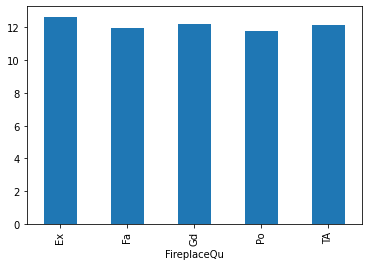

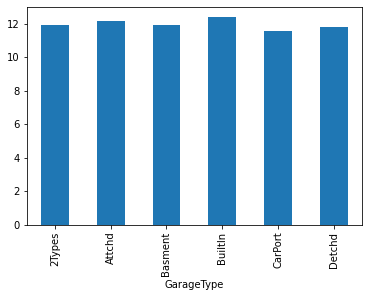

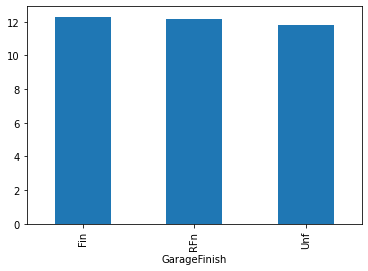

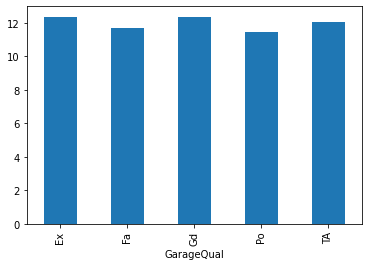

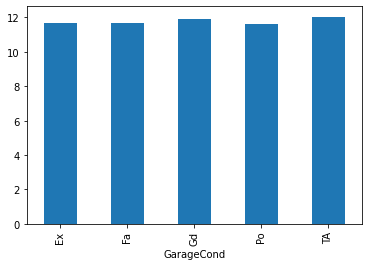

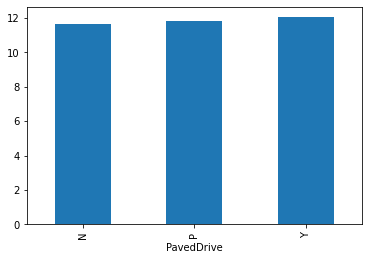

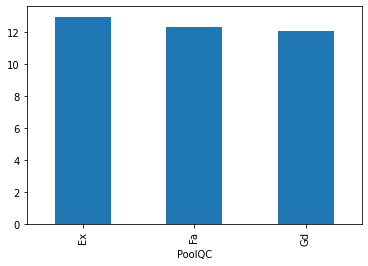

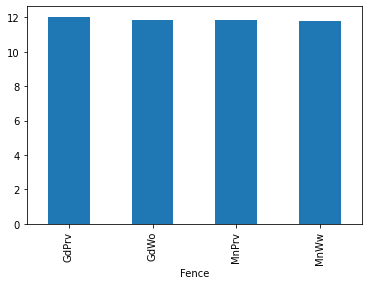

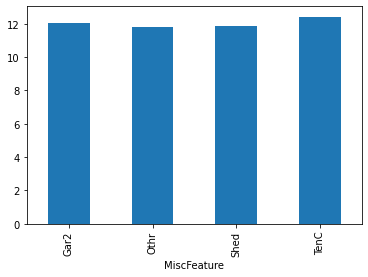

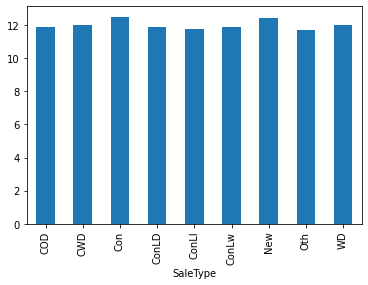

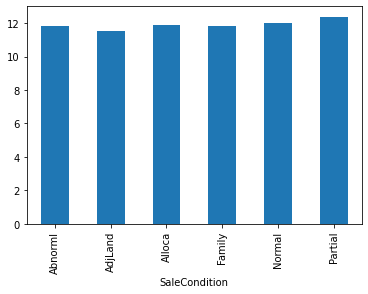

In [300]:
# comparing with sales price

for feature in categorical_feature:
    plt.figure()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)

# Feature engineering

#### Handling null values

In [301]:
# Replacing NA value using 'missing value lable' categorical column
cat_column = [i for i in train.columns if train[i].dtypes == 'O']
na_feature = [i for i in cat_column if train[i].isna().sum() > 0]
# function for replacing null value 

def replace_cat_feature(dataset,na_feature):
    data = train.copy()
    data[na_feature] = data[na_feature].fillna('Missing')
    return data

train = replace_cat_feature(train,na_feature)
#train[cat_column].isna().sum()

In [302]:
# Replacing NA value for numerical categori
numerical_na = [feature for feature in train.columns if train[feature].isnull().sum() > 1 and train[feature].dtypes != 'O']

for feature in numerical_na:
    medianValue = train[feature].median()
    
    train[feature].fillna(medianValue,inplace=True)

train[numerical_na].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Handling temporal variable

In [303]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train[feature] = train['YrSold'] - train[feature]
    
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Missing,Missing,Missing,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,215000


#### Handling skewed value 

In [304]:
numFeature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in numFeature:
    train[feature] = np.log(train[feature])

In [305]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4.248495,8.502689,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,11.759786
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Missing,Missing,Missing,0,10,2007,WD,Normal,12.498742
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,12.505399
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,12.154779
4,422,20,RL,4.248495,9.719264,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,12.278393


### Feature Scaling

In [306]:
feature_Scale = [feature for feature in train.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import LabelEncoder
sclar = LabelEncoder()

for i in feature_Scale:
    train[i] = sclar.fit_transform(train[i])
    
train[feature_Scale].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,11,3,40,80,1,1,0,3,0,4,0,13,2,2,4,2,5,4,31,32,1,1,8,9,3,0,3,4,1,2,4,4,0,25,6,0,500,286,1,4,1,4,180,0,0,70,0,0,2,0,2,1,3,3,6,1,5,1,30,2,2,118,5,5,2,0,144,0,0,0,0,3,2,1,0,1,1,8,4
1,0,3,65,808,1,1,0,3,0,4,1,12,2,2,0,2,7,5,37,38,0,5,12,13,3,0,2,2,2,4,1,1,0,112,5,107,527,624,1,0,1,4,654,0,0,646,1,0,2,0,4,1,2,6,6,1,5,1,37,3,2,248,5,5,2,29,145,0,0,48,0,3,2,1,0,9,1,8,4
2,5,3,62,449,1,1,0,3,0,1,0,15,2,2,0,5,6,4,11,11,1,1,7,7,3,0,2,4,2,2,4,0,2,382,6,0,135,312,1,0,1,4,295,215,0,585,1,0,2,1,3,1,3,6,6,1,5,1,10,3,2,129,5,5,2,96,101,0,0,0,0,3,2,1,0,5,1,8,4
3,0,3,75,632,1,1,0,3,0,4,0,14,2,2,0,2,5,5,33,34,3,1,8,9,1,236,3,4,1,2,4,4,1,312,6,0,558,590,1,0,1,4,617,0,0,520,0,0,2,0,3,1,3,5,6,1,5,1,33,2,2,200,5,5,2,0,95,0,0,0,0,3,3,1,0,0,4,0,4
4,0,3,40,821,1,1,0,3,0,2,0,14,2,2,0,2,5,6,32,10,1,1,4,4,4,73,2,4,1,2,4,4,0,489,6,0,192,537,1,2,1,4,541,0,0,399,0,1,2,0,3,1,2,6,6,1,5,1,32,0,2,188,5,5,2,140,0,0,0,0,0,3,2,1,0,5,3,8,4


### Saving the clean data into csv file.

In [307]:
train.to_csv("house_price_clean_data.csv",index=False)

### Feature selection using model.

In [308]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [309]:
#spliting X and Y variable

In [310]:
feature_x = train.drop(columns=['Id','SalePrice'])

In [311]:
target_y = train['SalePrice']

In [312]:
feature_selection = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_selection.fit(feature_x,target_y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [313]:
feature_selection.get_support()

array([ True, False,  True,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False,  True])

In [314]:
X_train_new = feature_x.columns[(feature_selection.get_support())]

In [315]:
X_train_new.shape  # we reduced almost half of the feature using feature selection

(41,)

In [316]:
x = feature_x[X_train_new]

In [317]:
y = target_y

### Model Selection

In [318]:
# importing required lib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [319]:
# Random state selection

maxscore = 0
maxRs =0

for i in range(1000):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=i,test_size=0.35)
    le = LinearRegression()
    le.fit(x_train,y_train)
    y_prec = le.predict(x_test)
    
    score =r2_score(y_test,y_prec)
    
    if score > maxscore:
        maxscore = score
        maxRs = i
                
print(f"best random state{maxRs} and best score {maxscore}")   

best random state317 and best score 0.9101890052443433


In [320]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=317,test_size=0.35)

### Linear Regrssion Model

In [321]:
le = LinearRegression()
le.fit(x_train,y_train)
y_prec = le.predict(x_test)
    
score =r2_score(y_test,y_prec)
score

0.9101890052443433

In [322]:
# Cross validation 
cr = cross_val_score(le,x,y,cv=5)
crScore = cr.mean()

In [323]:
linear = score -crScore

### RandomForest Regrssion

In [324]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_prec = rf.predict(x_test)

score =r2_score(y_test,y_prec)
score

0.8793755900649856

In [325]:
# Cross validation 
cr = cross_val_score(rf,x,y,cv=5)
crScore = cr.mean()

In [326]:
random = score - crScore

#### if we compare the model and cross validation score difference Random forest is working good.

In [327]:
# further hyper parameter tunning the both model

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
param = {'n_estimators':[100,200,300],
         'criterion':['mse', 'mae']}

In [330]:
parameter = GridSearchCV(rf,param)
parameter.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': [100, 200, 300]})

In [331]:
print(parameter.best_params_)

{'criterion': 'mse', 'n_estimators': 100}


In [332]:
rf = RandomForestRegressor(criterion = 'mse', n_estimators = 300)
rf.fit(x_train,y_train)
y_prec = rf.predict(x_test)

score =r2_score(y_test,y_prec)
score

0.8833883192892019

### Saving the model

In [333]:
import joblib
House_Predic = joblib.dump(rf,"Model/House_Predic.obj")
House_Predic

['Model/House_Predic.obj']

In [334]:
test =pd.read_csv("Datasets/house_test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


### Feature engineering for test data

#### Handling null values

In [335]:
# Replacing NA value using 'missing value lable' categorical column
cat_column = [i for i in test.columns if test[i].dtypes == 'O']
na_feature = [i for i in cat_column if test[i].isna().sum() > 0]
# function for replacing null value 

def replace_cat_feature(dataset,na_feature):
    data = test.copy()
    data[na_feature] = data[na_feature].fillna('Missing')
    return data

test = replace_cat_feature(test,na_feature)
#train[cat_column].isna().sum()

In [336]:
# Replacing NA value for numerical category
numerical_na = [feature for feature in test.columns if test[feature].isnull().sum() > 1 and test[feature].dtypes != 'O']

for feature in numerical_na:
    medianValue = test[feature].median()
    
    test[feature].fillna(medianValue,inplace=True)

test[numerical_na].isna().sum()

LotFrontage      0
GarageYrBlt      0
PoolQC         292
dtype: int64

In [337]:
test['PoolQC'] = test['PoolQC'].fillna(value=0)

In [ ]:
test[numerical_na]

In [339]:
test[numerical_na].isna().sum() # In test data all null values cleared.

LotFrontage    0
GarageYrBlt    0
PoolQC         0
dtype: int64

In [340]:
# Handling Year Feature

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test[feature] = test['YrSold'] - test[feature]
    
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,Missing,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2,1,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0.0,Missing,Missing,0,7,2007,WD,Normal
1,1018,120,RL,65.0,5814,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,25,25,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,25.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0.0,Missing,Missing,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,8,8,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,8.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0.0,Missing,Missing,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,Missing,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,68,59,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,68.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0.0,Missing,Missing,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,1,1,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,1.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0.0,Missing,Missing,0,1,2008,WD,Normal


In [342]:
# handling skewness

numFeature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']

for feature in numFeature:
    test[feature] = np.log(test[feature])

In [343]:
# Feature Scaling

feature_Scale = [feature for feature in test.columns if feature not in ['Id','SalePrice']]

sclar = LabelEncoder()

for i in feature_Scale:
    test[i] = sclar.fit_transform(test[i])
    
test[feature_Scale].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,47,215,1,1,0,1,0,0,0,21,2,0,0,2,6,2,2,1,3,0,9,11,4,45,2,3,2,0,3,1,2,170,6,0,139,217,0,0,1,4,229,0,0,203,1,0,2,0,3,0,2,5,5,1,2,1,2,0,3,129,5,5,2,46,27,0,0,0,0,0,2,0,0,6,1,5,2
1,11,2,29,34,1,1,0,3,0,1,0,21,2,0,4,2,5,2,22,24,1,0,5,5,3,0,2,3,1,2,3,0,2,151,6,0,24,139,0,2,1,4,167,0,0,93,1,0,1,0,1,0,2,1,5,1,0,1,24,2,2,104,5,5,2,9,0,0,0,0,0,0,2,0,0,7,3,0,0
2,0,2,29,180,1,1,3,3,0,4,0,4,2,0,0,2,5,2,8,8,3,0,9,11,3,0,2,3,2,2,3,0,6,0,6,0,228,209,0,0,1,4,223,0,0,190,0,0,2,0,3,0,0,4,5,1,5,1,8,2,2,89,5,5,2,50,72,0,0,0,0,0,2,0,0,5,3,5,2
3,6,2,39,185,1,1,3,0,0,4,0,5,2,0,0,5,4,4,60,57,1,0,6,7,3,0,3,3,1,4,3,4,5,28,6,0,92,31,0,0,1,4,57,41,0,138,0,0,1,1,3,0,1,4,5,1,2,1,62,3,1,6,5,5,2,0,0,0,0,0,0,0,2,0,0,6,3,5,2
4,5,2,47,220,1,1,0,3,0,1,0,20,1,0,0,5,3,2,1,1,1,0,9,11,4,11,2,3,2,2,3,3,6,0,6,0,181,76,0,0,1,4,65,93,0,205,0,0,2,1,4,0,2,6,5,1,2,3,1,0,3,126,5,5,2,17,3,0,0,0,0,0,2,0,0,0,2,5,2


In [344]:
# cleaned test dataset

test.to_csv("house_prediction_test.csv")

In [350]:
feature = x_train.columns

x_test = [t for t in test.columns if t in feature]
len(x_test)

41

In [351]:
x_test = test[x_test]
x_test.shape

(292, 41)

### Now we are predicting model using test data set

In [361]:
house_prediction = joblib.load("Model/House_Predic.obj")
y_test_house = house_prediction.predict(x_test)
y_test_house = pd.DataFrame(data=y_test_house,columns=["SalesPrice"])
y_test_house

,SalesPrice
0,12.194386
1,11.723396
2,11.849575
3,11.465791
4,11.724603
5,10.999711
6,11.511826
7,11.842575
8,11.789414
9,11.546559


In [362]:
y_test_house.to_csv("house_prediction_result.csv")